In [139]:
#Linear regression using sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [85]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [86]:
x=data['SAT']
y=data['GPA']
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [87]:
reg =LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
reg.score(x_matrix,y)


0.40600391479679765

In [89]:
reg.coef_  #SAT coefficient x1

array([0.00165569])

In [90]:
reg.intercept_ #constant B0

0.2750402996602803

In [91]:
#x_matrix = x.values.reshape(-1,1)
reg.predict([[1740]])

array([3.15593751])

In [92]:
reg.predict([[1760]])

array([3.18905127])

In [93]:
new_data = pd.DataFrame(data=[1740,1760], columns= ['SAT'])
new_data

,SAT
0,1740
1,1760


In [94]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [95]:
new_data['Predicted_GPA']=reg.predict(new_data)


In [96]:
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


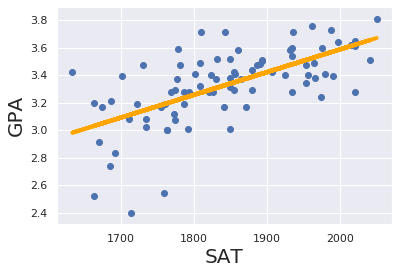

In [100]:
plt.scatter(x,y)
yhat = reg.coef_* x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw=4,c='orange', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()


In [120]:
#multilinear regression using SKlearn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [105]:
data =pd.read_csv('1.02. Multiple linear regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [111]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [122]:
x1=data[['SAT','Rand 1,2,3']]
y=data['GPA']

x= sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           6.58e-10
Time:                        19:18:51   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x= sm.add_constant(x1)

In [109]:
reg = LinearRegression()

In [110]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
 reg.score(x1,y)

0.4066811952814285

In [125]:
reg.intercept_

0.29603261264909486

In [126]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [133]:
#Adjustion Rsquare formula 
# adjustion_r2 
r2 = reg.score(x1,y)
n=x1.shape[0]    #x.shape 
p=x1.shape[1]    # ->(84,2) (n0.of observation , no. of feature )
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.39203134825134023

In [134]:
from sklearn.feature_selection import f_regression 

In [136]:
f_regression(x1,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [137]:
#we only need p- value and that is around 3digits

p_values =f_regression(x1,y)[1]

In [138]:
p_values.round(3)

array([0.   , 0.676])

In [141]:
reg_summary = pd.DataFrame(data= x1.columns.values, columns=['features'])
reg_summary 

,features
0,SAT
1,"Rand 1,2,3"


In [142]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676
